<a href="https://colab.research.google.com/github/AnkitaSinha98/DeepLearningProgram/blob/main/ConfusionMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Confusion Matrix using Dataset
ANKITA SINHA
20MCI0003

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/dataset.csv'

In [ ]:
data = pd.read_csv(file_path)
data.head(10)


,y_act,y_pred_random_forest,y_pred_logistic
0,1,0.639816,0.531904
1,0,0.490993,0.414496
2,1,0.623815,0.569883
3,1,0.506616,0.443674
4,0,0.418302,0.369532
5,0,0.540665,0.582447
6,0,0.333361,0.376542
7,0,0.309166,0.287872
8,0,0.532531,0.524141
9,0,0.423434,0.435693


In [ ]:
thresh = 0.4

data['y_pred_rf'] = (data.y_pred_random_forest >= 0.4).astype('int')
data['y_pred_lr'] = (data.y_pred_logistic >= 0.4).astype('int')

data.head(10)

,y_act,y_pred_random_forest,y_pred_logistic,y_pred_rf,y_pred_lr
0,1,0.639816,0.531904,1,1
1,0,0.490993,0.414496,1,1
2,1,0.623815,0.569883,1,1
3,1,0.506616,0.443674,1,1
4,0,0.418302,0.369532,1,0
5,0,0.540665,0.582447,1,1
6,0,0.333361,0.376542,0,0
7,0,0.309166,0.287872,0,0
8,0,0.532531,0.524141,1,1
9,0,0.423434,0.435693,1,1


In [ ]:
data.shape

(15758, 5)

In [ ]:
confusion_matrix_lr = pd.crosstab(data['y_act'], data['y_pred_lr'], 
                                  rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_lr

Predicted,0,1
Actual,,
0,2862,5017
1,1344,6535


In [ ]:
confusion_matrix_rf = pd.crosstab(data['y_act'], data['y_pred_rf'], 
                                  rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_rf

Predicted,0,1
Actual,,
0,1930,5949
1,468,7411


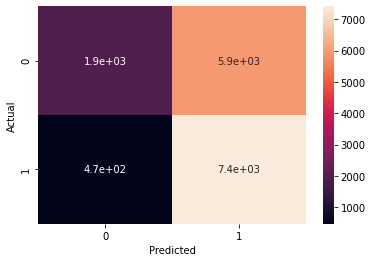

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
                         
sn.heatmap(confusion_matrix_rf, annot=True)

plt.show()

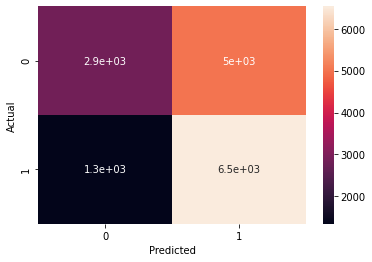

In [ ]:
sn.heatmap(confusion_matrix_lr, annot=True)

plt.show()

In [ ]:
def compute_tp_tn_fn_fp(y_act, y_pred):
	tp = sum((y_act == 1) & (y_pred == 1))
	tn = sum((y_act == 0) & (y_pred == 0))
	fn = sum((y_act == 1) & (y_pred == 0))
	fp = sum((y_act == 0) & (y_pred == 1))
	return tp, tn, fp, fn

In [ ]:
tp_lr, tn_lr, fp_lr, fn_lr = compute_tp_tn_fn_fp(data.y_act, data.y_pred_lr)
print('TP for Logistic Reg :', tp_lr)
print('TN for Logistic Reg :', tn_lr)
print('FP for Logistic Reg :', fp_lr)
print('FN for Logistic Reg :', fn_lr)

TP for Logistic Reg : 6535
TN for Logistic Reg : 2862
FP for Logistic Reg : 5017
FN for Logistic Reg : 1344


In [ ]:
tp_rf, tn_rf, fp_rf, fn_rf = compute_tp_tn_fn_fp(data.y_act, data.y_pred_rf)
print('TP for Random Forest :', tp_rf)
print('TN for Random Forest :', tn_rf)
print('FP for Random Forest :', fp_rf)
print('FN for Random Forest :', fn_rf)


TP for Random Forest : 7411
TN for Random Forest : 1930
FP for Random Forest : 5949
FN for Random Forest : 468


In [ ]:
def compute_accuracy(tp, tn, fn, fp):
	return ((tp + tn) * 100)/ float( tp + tn + fn + fp)
 
print('Accuracy for Logistic Regression :', 
      compute_accuracy(tp_lr, tn_lr, fn_lr, fp_lr))
print('Accuracy for Random Forest :', 
      compute_accuracy(tp_rf, tn_rf, fn_rf, fp_rf))

Accuracy for Logistic Regression : 59.63320218301815
Accuracy for Random Forest : 59.27782713542328


In [ ]:
def compute_precision(tp, fp):
	return (tp  * 100)/ float( tp + fp)
 
print('Precision for Logistic Regression :', 
      compute_precision(tp_lr, fp_lr))
print('Precision for Random Forest :', 
      compute_precision(tp_rf, fp_rf))

Precision for Logistic Regression : 56.57029085872576
Precision for Random Forest : 55.471556886227546


In [ ]:
def compute_recall(tp, fn):
	return (tp  * 100)/ float( tp + fn)

print('Recall for Logistic Regression :', 
      compute_recall(tp_lr, fn_lr))
print('Recall for Random Forest :',
      compute_recall(tp_rf, fn_rf))

Recall for Logistic Regression : 82.94199771544612
Recall for Random Forest : 94.06015991877142


In [ ]:
def compute_f1_score(y_true, y_pred):
    # calculates the F1 score
    tp, tn, fp, fn = compute_tp_tn_fn_fp(y_true, y_pred)
    precision = compute_precision(tp, fp)/100
    recall = compute_recall(tp, fn)/100
    f1_score = (2*precision*recall)/ (precision + recall)
    return f1_score

print('F1 score for Logistic Regression :', 
      compute_f1_score(data.y_act, data.y_pred_lr))
print('F1 score for Random Forest :', 
      compute_f1_score(data.y_act, data.y_pred_rf))

F1 score for Logistic Regression : 0.6726365086717101
F1 score for Random Forest : 0.6978671312208673
